南昂汰 1922076

# Understanding Audio data, Fourier Transform, FFT and Spectrogram features for a Speech Recognition System

https://towardsdatascience.com/understanding-audio-data-fourier-transform-fft-spectrogram-and-speech-recognition-a4072d228520

1. Reading Audio Files
2. Fourier Transform (FT)
3. Fast Fourier Transform (FFT)
4. Spectrogram
5. Speech Recognition using Spectrogram Features
6. Conclusion


In [93]:
# mount google drive to colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
# Library and data path setting

import os, sys

#sys.path.append(os.getcwd())

# change directory to the execution home
os.chdir('/content/drive/MyDrive/Colab Notebooks/MU-Image-Speech-recognition/Speech-recognition')

In [95]:
!pwd

/content/drive/.shortcut-targets-by-id/1t31jSs9BY53_TKDGyZReMlPI1mk9MX2_/MU-Image-Speech-recognition/Speech-recognition


# 1. Reading Audio Files

LibROSA is a python library that has almost every utility you are going to need while working on audio data. This rich library comes up with a large number of different functionalities. Here is a quick light on the features —

1. Loading and displaying characteristics of an audio file.
2. Spectral representations
3. Feature extraction and Manipulation
4. Time-Frequency conversions
5. Temporal Segmentation
6. Sequential Modeling…etc

In [96]:
!pip install --upgrade pip

In [97]:
!pip install librosa

In [98]:
# Load Audio file

import librosa

file_path = "/content/a.mp3"
#file_path = "jackhammer.wav"

samples, sampling_rate = librosa.load(file_path, sr=None, mono=True, offset=0.0, duration=None)
len(samples), sampling_rate

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(933120, 44100)

In [99]:
duration_of_sound = len(samples)/sampling_rate
print (duration_of_sound, "seconds")

21.15918367346939 seconds


In [100]:
# Audio file playback

from IPython.display import Audio
Audio(file_path)

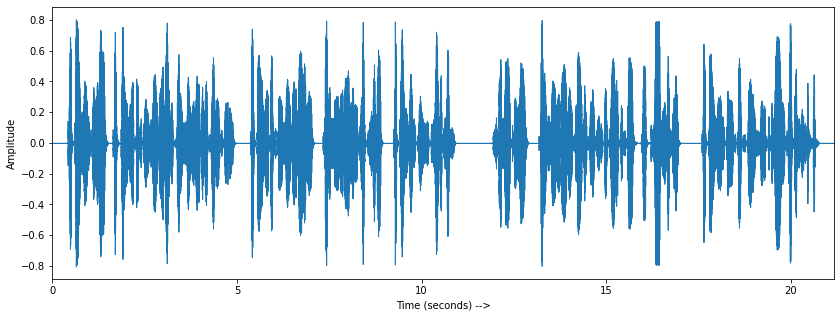

In [101]:
# Visualizing Audio
# This visualization is called the time-domain representation of a given signal. 
# This shows us the loudness (amplitude) of sound wave changing with time. 
# Here amplitude = 0 represents silence. (From the definition of sound waves — 
# This amplitude is actually the amplitude of air particles which are oscillating because 
# of the pressure change in the atmosphere due to sound).


from librosa import display
import matplotlib.pyplot as plt

#plt.figure()
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y=samples, sr=sampling_rate)
plt.xlabel("Time (seconds) -->")
plt.ylabel("Amplitude")
plt.show()

# 2. Fourier Transform (FT)

Transform an audio signal（音声データ）from 

- Time-domain (Time x Amplitude) to Frequency-domain (Frequency x Power).
- 時系列データ（時間 X 振幅）を 周波数データ（周波数 X パワー）に変換する

An audio signal is a complex signal composed of multiple ‘single-frequency sound waves’ which travel together as a disturbance(pressure-change) in the medium. When sound is recorded we only capture the resultant amplitudes of those multiple waves. Fourier Transform is a mathematical concept that can decompose a signal into its constituent frequencies. Fourier transform does not just give the frequencies present in the signal, It also gives the magnitude of each frequency present in the signal.

# 3. Fast Fourier Transform (FFT)
<u>Fast Fourier Transformation (FFT)</u> is a mathematical algorithm that calculates <b>Discrete Fourier Transform (DFT)</b> of a given sequence. The only difference between FT (Fourier Transform) and FFT is that FT considers a continuous signal while <u>FFT takes a discrete signal as input</u>. DFT converts a sequence (discrete signal) into its frequency constituents just like FT does for a continuous signal. In our case, we have a sequence of amplitudes that were sampled from a continuous audio signal. DFT or FFT algorithm can convert this time-domain discrete signal into a frequency-domain.

![1*7sKM9aECRmuoqTadCYVw9A.jpeg](attachment:1*7sKM9aECRmuoqTadCYVw9A.jpeg)

# Simple Sine Wave to Understand FFT
To understand the output of FFT, let’s create a simple sine wave. The following piece of code creates a sine wave with a sampling rate = 100, amplitude = 1 and frequency = 3. Amplitude values are calculated every 1/100th second (sampling rate) and stored into a list called y1. We will pass these discrete amplitude values to calculate DFT of this signal using the FFT algorithm.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


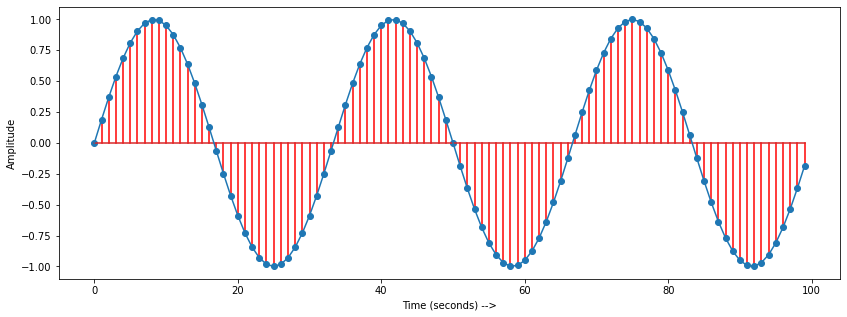

In [102]:
import numpy as np

samples = 100
f = 3
x = np.arange(samples)
y1 = np.sin(2*np.pi*f * (x/samples))
plt.figure(figsize=(14, 5))
plt.stem(x,y1,'r',)
plt.plot(x,y1)
plt.xlabel("Time (seconds) -->")
plt.ylabel("Amplitude")
plt.show()

In [103]:
import scipy
import numpy as np

def fft_plot(audio, sampling_rate):
    n = len(audio)
    T = 1/sampling_rate
    yf = scipy.fftpack.fft(audio)
    xf = np.linspace(0.0, 1.0/(2.0*T), n//2)
    fig, ax = plt.subplots()
    ax.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    plt.grid()
    plt.xlabel("Frequency -->")
    plt.ylabel("Magnitude")
    return plt.show()

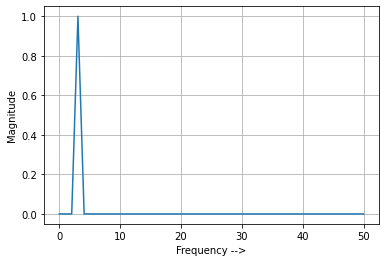

In [104]:
fft_plot(y1, samples)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


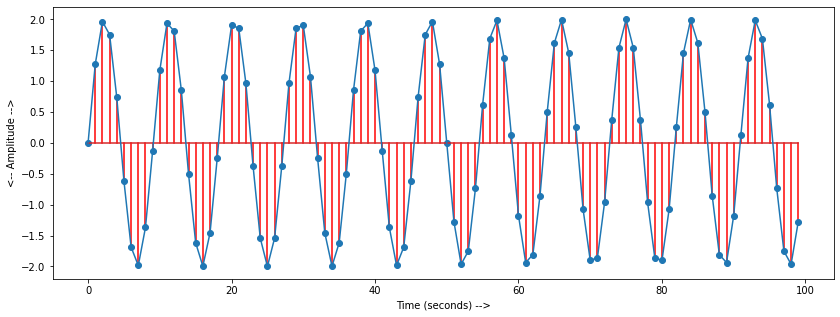

In [105]:
import numpy as np

samples = 100
f = 11
x = np.arange(samples)
y2 = 2 * np.sin(2*np.pi*f * (x/samples))
plt.figure(figsize=(14, 5))
plt.stem(x,y2,'r',)
plt.plot(x,y2)
plt.xlabel("Time (seconds) -->")
plt.ylabel("<-- Amplitude -->")
plt.show()

In [106]:
y3 = y1 + y2

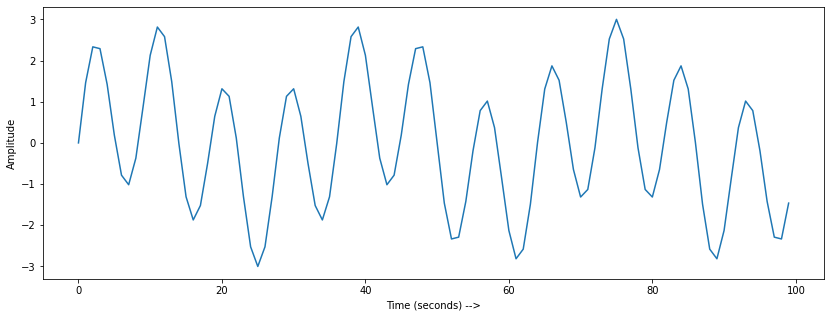

In [107]:
#plt.stem(x,y3,'r',)
plt.figure(figsize=(14, 5))
plt.plot(x,y3)
plt.xlabel("Time (seconds) -->")
plt.ylabel("Amplitude")
plt.show()

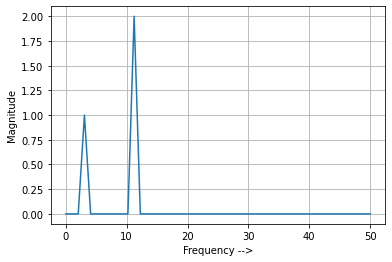

In [108]:
fft_plot(y3, samples)

# FFT on Audio signal

In [109]:
# Load Audio file
import librosa

file_path = "/content/a.mp3"
#file_path = "jackhammer.wav"

samples, sampling_rate = librosa.load(file_path, sr=None, mono=True, offset=0.0, duration=None)
len(samples), sampling_rate

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(933120, 44100)

In [110]:
duration_of_sound = len(samples)/sampling_rate
print (duration_of_sound, "seconds")

21.15918367346939 seconds


In [111]:
# Audio file playback

from IPython.display import Audio
Audio(file_path)

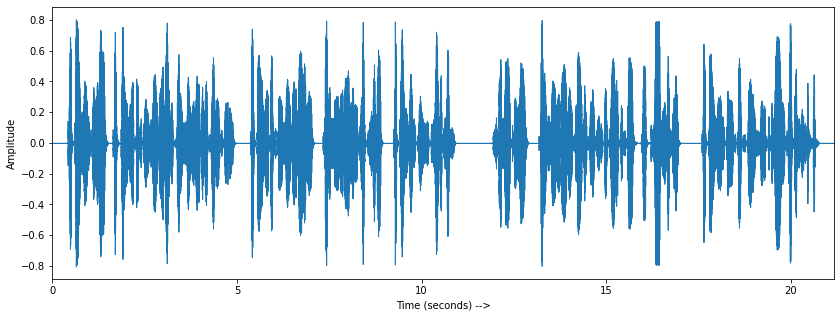

In [112]:
# Visualizing Audio
# This visualization is called the time-domain representation of a given signal. 
# This shows us the loudness (amplitude) of sound wave changing with time. 
# Here amplitude = 0 represents silence. (From the definition of sound waves — 
# This amplitude is actually the amplitude of air particles which are oscillating because 
# of the pressure change in the atmosphere due to sound).


from librosa import display
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
librosa.display.waveplot(y=samples, sr=sampling_rate)
plt.xlabel("Time (seconds) -->")
plt.ylabel("Amplitude")
plt.show()

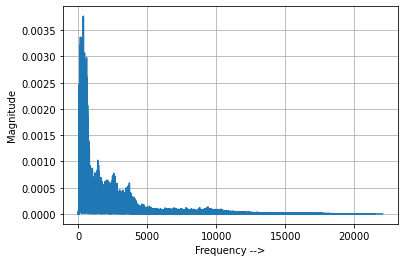

In [113]:
fft_plot(samples, sampling_rate)

# 4. Spectrogram

<u>When we applied FFT to our signal, it gave us only frequency values and we lost the track of time information</u>. Now our system won’t be able to tell what was spoken first if we use these frequencies as features. We need to find a different way to calculate features for our system such that it has frequency values along with the time at which they were observed. Here Spectrograms come into the picture.

# Spectrogram

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


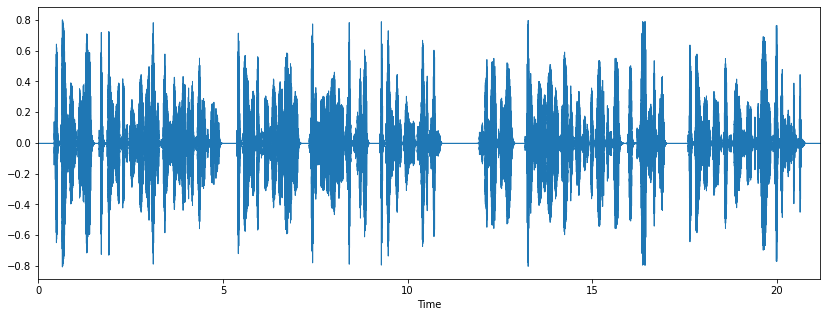

In [114]:
# Size of the FFT, which will also be used as the window length
n_fft=2048

# Step or stride between windows. If the step is smaller than the window lenght, the windows will overlap
hop_length=512

# Load sample audio file
samples, sampling_rate = librosa.load(file_path)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y=samples, sr=sampling_rate)

# Calculate the spectrogram as the square of the complex magnitude of the Short-time Fourier transform (STFT)
# - The STFT represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) 
#   over short overlapping windows.

spectrogram_librosa = np.abs(librosa.stft(
    samples, n_fft=n_fft, hop_length=hop_length, win_length=n_fft, window='hann')) ** 2

# Visualize Spectrogram

Visual representation of frequencies of a given signal with time is called Spectrogram. In a spectrogram representation plot — 
- one axis represents the time, 
- the second axis represents frequencies and 
- the colors represent magnitude (amplitude) of the observed frequency at a particular time. 

The following screenshot represents the spectrogram of the same audio signal we discussed earlier. Bright colors represent strong frequencies. Similar to earlier FFT plot, smaller frequencies ranging from (0–1kHz) are strong (bright).


In [115]:
spectrogram_librosa_db = librosa.power_to_db(spectrogram_librosa, ref=np.max)

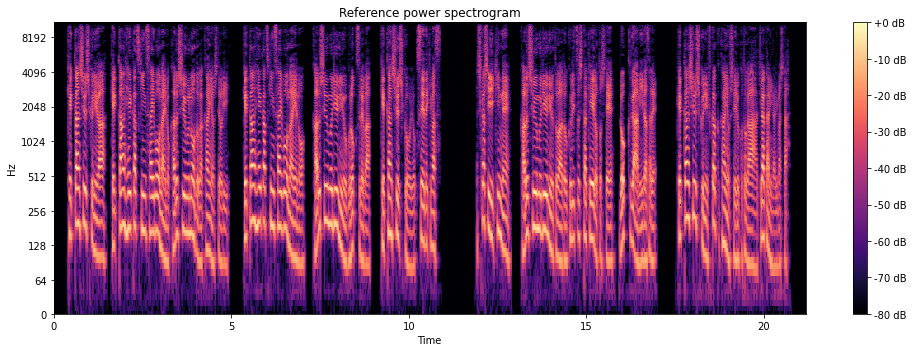

In [116]:
def show_spectrogram(spec, title, sr, hop_length, y_axis='log', x_axis='time'):
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(spec, sr=sr, y_axis=y_axis, x_axis=x_axis, hop_length=hop_length)
    plt.title(title)
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()

show_spectrogram(spectrogram_librosa_db, 'Reference power spectrogram', sampling_rate, hop_length)

# MEL Spectrogram

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


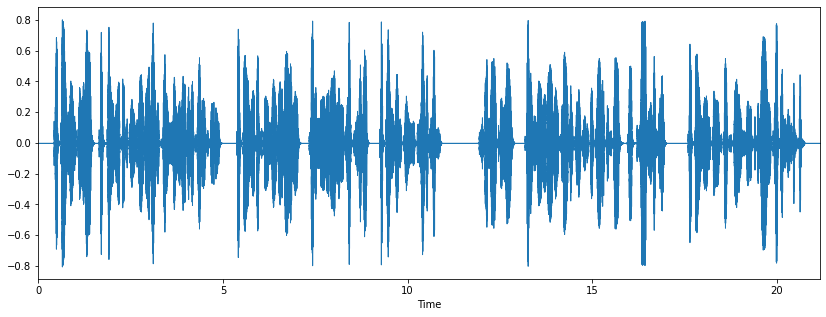

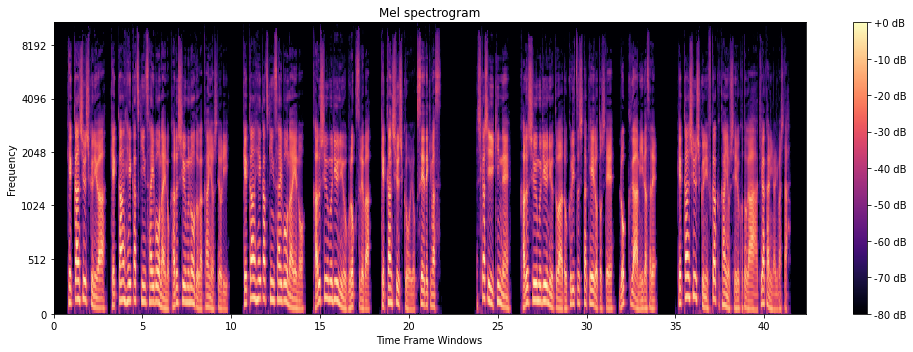

In [117]:
import librosa
import matplotlib.pyplot as plt

file_path = "/content/a.mp3"
#file_path = "jackhammer.wav"

samples, sampling_rate = librosa.load(file_path, sr=None, mono=True, offset=0.0, duration=None)

plt.figure(figsize=(14, 5))
librosa.display.waveplot(y=samples, sr=sampling_rate)

melspectrogram = librosa.feature.melspectrogram(y=samples, sr=sampling_rate)
plt.figure(figsize=(14, 5))
librosa.display.specshow(librosa.power_to_db(melspectrogram, ref=np.max), x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.xlabel("Time Frame Windows")
plt.ylabel("Frequency")
plt.tight_layout()

# Mel-Frequency Cepstral Coefficients (MFCCs)
https://docs.nvidia.com/deeplearning/dali/user-guide/docs/examples/audio_processing/spectrogram.html

MFCCs are an alternative representation of the Mel-frequency spectrogram often used in audio applications. The MFCCs are calculated by applying the Discrete Cosine Transform (DCT) to a mel-frequency spectrogram.

(20, 1823)


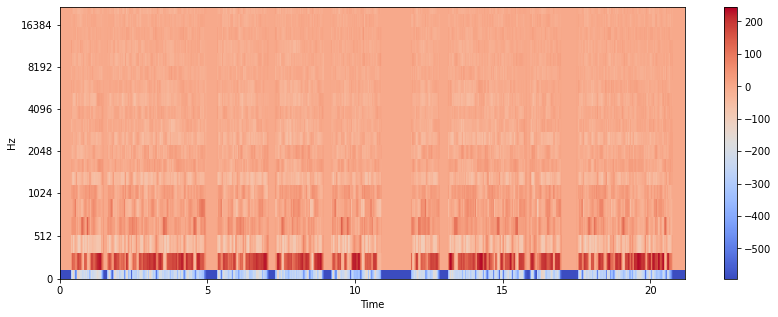

In [118]:
mfccs = librosa.feature.mfcc(samples, sr=sampling_rate)
print(mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time', y_axis='mel')
plt.colorbar()

# Why Spectrogram

Suppose you are working on a Speech Recognition task. You have an audio file in which someone is speaking a phrase (for example: How are you). Your recognition system should be able to predict these three words in the same order (1. ‘how’, 2. ‘are’, 3. ‘you’). If you remember, in the previous exercise we broke our signal into its frequency values which will serve as features for our recognition system. But when we applied FFT to our signal, it gave us only frequency values and we lost the track of time information. Now our system won’t be able to tell what was spoken first if we use these frequencies as features. We need to find a different way to calculate features for our system such that it has frequency values along with the time at which they were observed. Here Spectrograms come into the picture.
Visual representation of frequencies of a given signal with time is called Spectrogram. In a spectrogram representation plot — one axis represents the time, the second axis represents frequencies and the colors represent magnitude (amplitude) of the observed frequency at a particular time. The following screenshot represents the spectrogram of the same audio signal we discussed earlier. Bright colors represent strong frequencies. Similar to earlier FFT plot, smaller frequencies ranging from (0–1kHz) are strong(bright).


In [119]:
def spectrogram(samples, sample_rate, stride_ms = 10.0, 
                          window_ms = 20.0, max_freq = None, eps = 1e-14):

    stride_size = int(0.001 * sample_rate * stride_ms)
    window_size = int(0.001 * sample_rate * window_ms)

    # Extract strided windows
    truncate_size = (len(samples) - window_size) % stride_size
    samples = samples[:len(samples) - truncate_size]
    nshape = (window_size, (len(samples) - window_size) // stride_size + 1)
    nstrides = (samples.strides[0], samples.strides[0] * stride_size)
    windows = np.lib.stride_tricks.as_strided(samples, 
                                          shape = nshape, strides = nstrides)
    
    assert np.all(windows[:, 1] == samples[stride_size:(stride_size + window_size)])

    # Window weighting, squared Fast Fourier Transform (fft), scaling
    weighting = np.hanning(window_size)[:, None]
    
    fft = np.fft.rfft(windows * weighting, axis=0)
    fft = np.absolute(fft)
    fft = fft**2
    
    scale = np.sum(weighting**2) * sample_rate
    fft[1:-1, :] *= (2.0 / scale)
    fft[(0, -1), :] /= scale
    
    # Prepare fft frequency list
    freqs = float(sample_rate) / window_size * np.arange(fft.shape[0])
    
    # Compute spectrogram feature
    ind = np.where(freqs <= max_freq)[0][-1] + 1
    specgram = np.log(fft[:ind, :] + eps)
    return specgram

In [120]:
X = spectrogram(samples, sampling_rate, max_freq=25000)

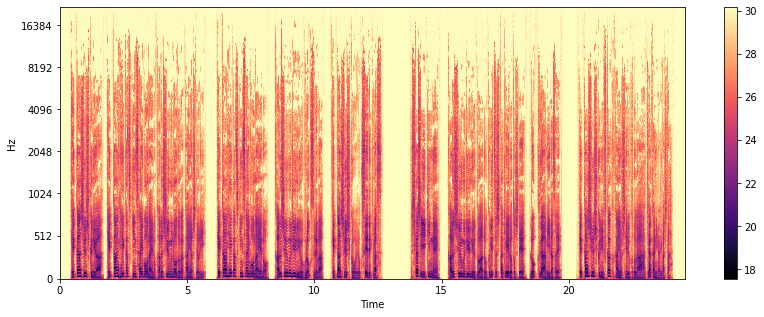

In [121]:
# display Spectrogram
# Short-time Fourier transform (STFT)

#X = librosa.stft(samples)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='mel') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()